<a href="https://colab.research.google.com/github/erbisti/Collab/blob/main/CIFAR10_com_filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "cnn_cifar10_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,986 (277.29 KB)

 Trainable params: 70,986 (277.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2921 - loss: 1.9632 - val_accuracy: 0.4730 - val_loss: 1.4647
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4944 - loss: 1.4367 - val_accuracy: 0.5588 - val_loss: 1.2747
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5521 - loss: 1.2810 - val_accuracy: 0.5704 - val_loss: 1.2278
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5840 - loss: 1.1891 - val_accuracy: 0.5844 - val_loss: 1.1771
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6093 - loss: 1.1250 - val_accuracy: 0.6050 - val_loss: 1.1301
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6275 - loss: 1.0737 - val_accuracy: 0.6182 - val_loss: 1.0942
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6410 - loss: 1.0335 - val_accuracy: 0.6266 - val_loss: 1.0688
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6558 - loss: 0.9989 - val_accuracy: 0

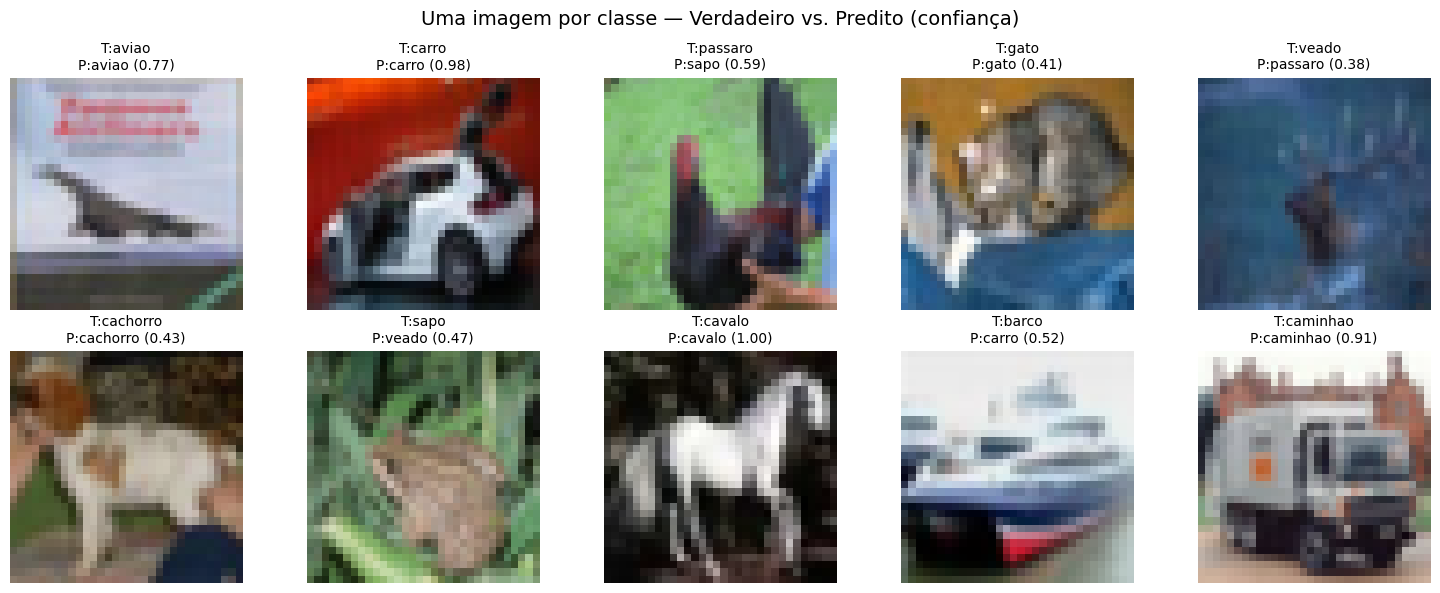

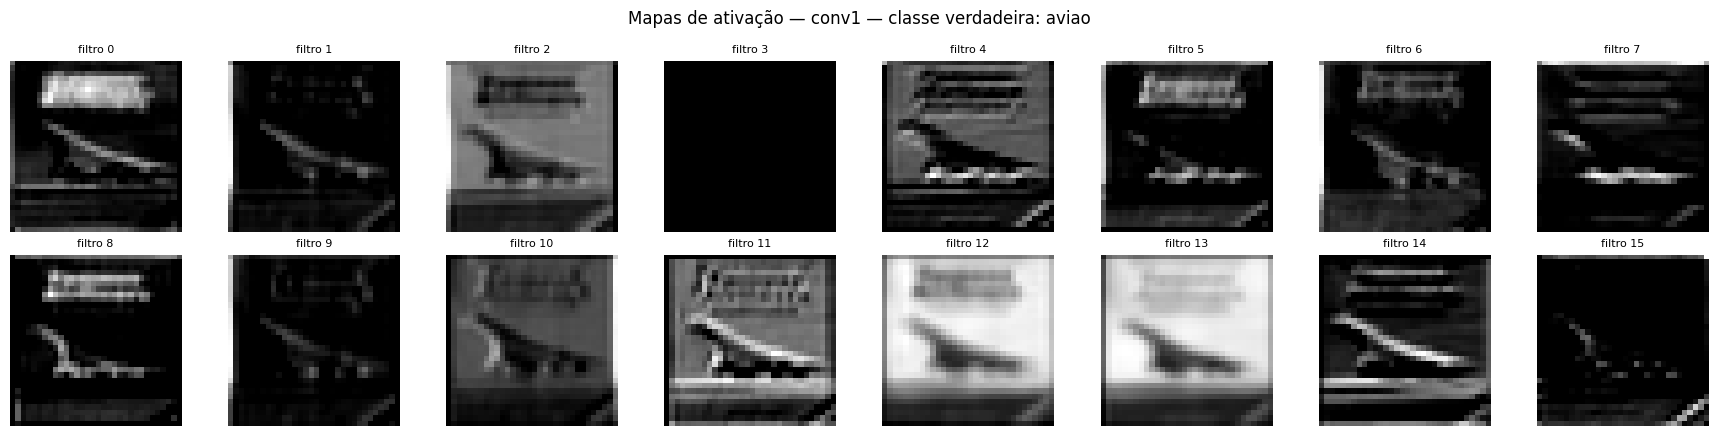

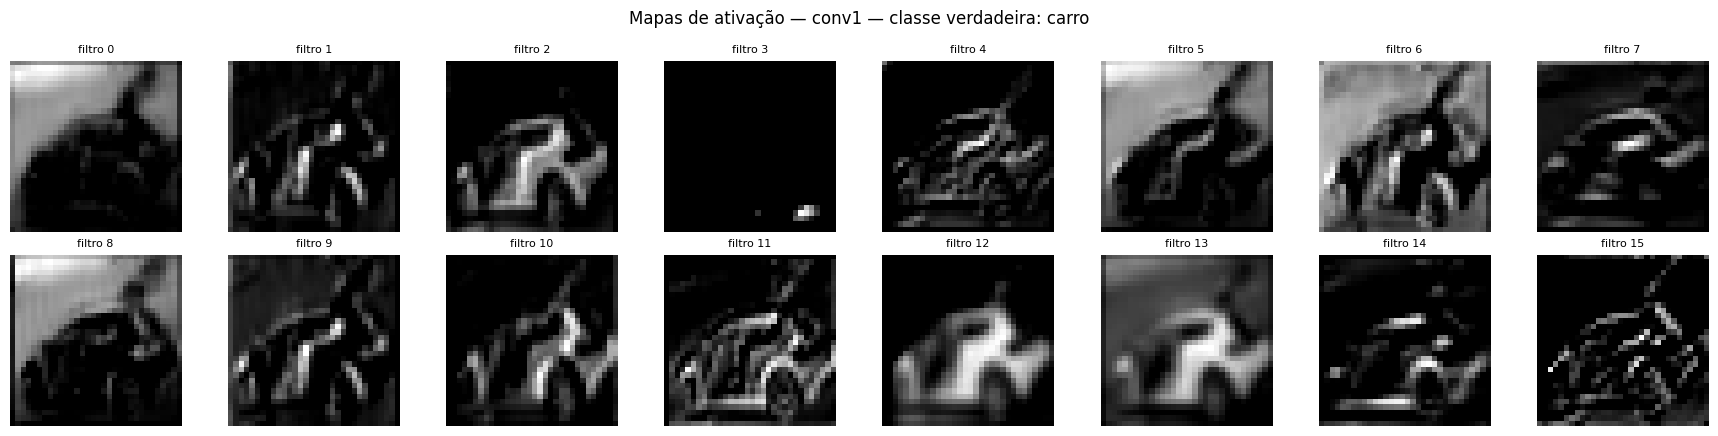

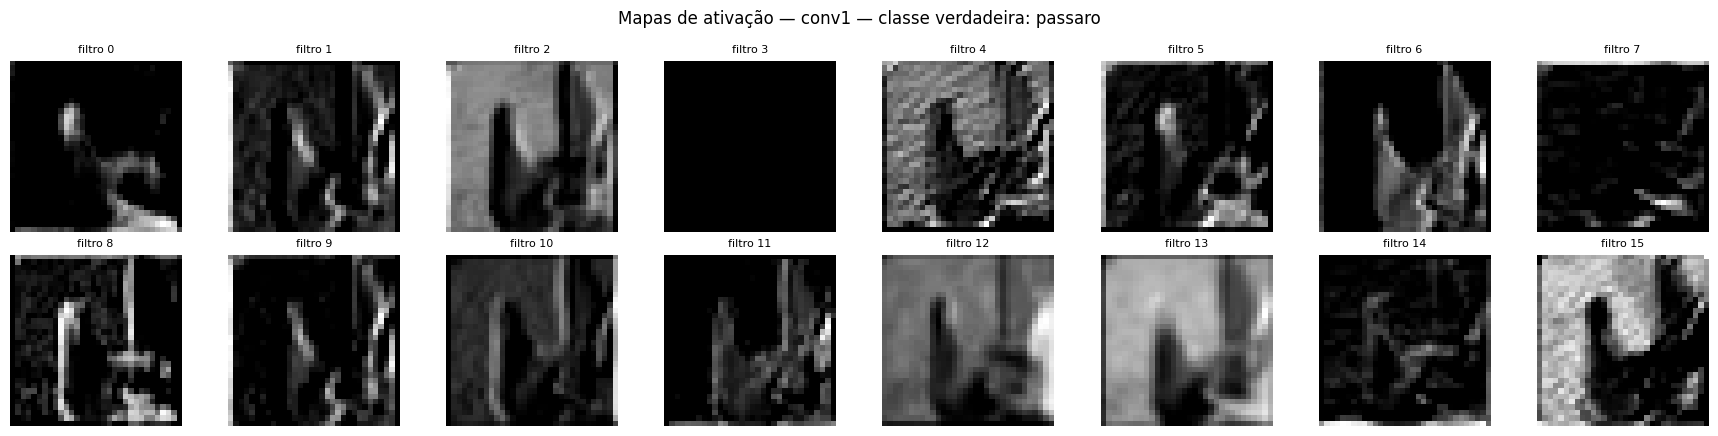

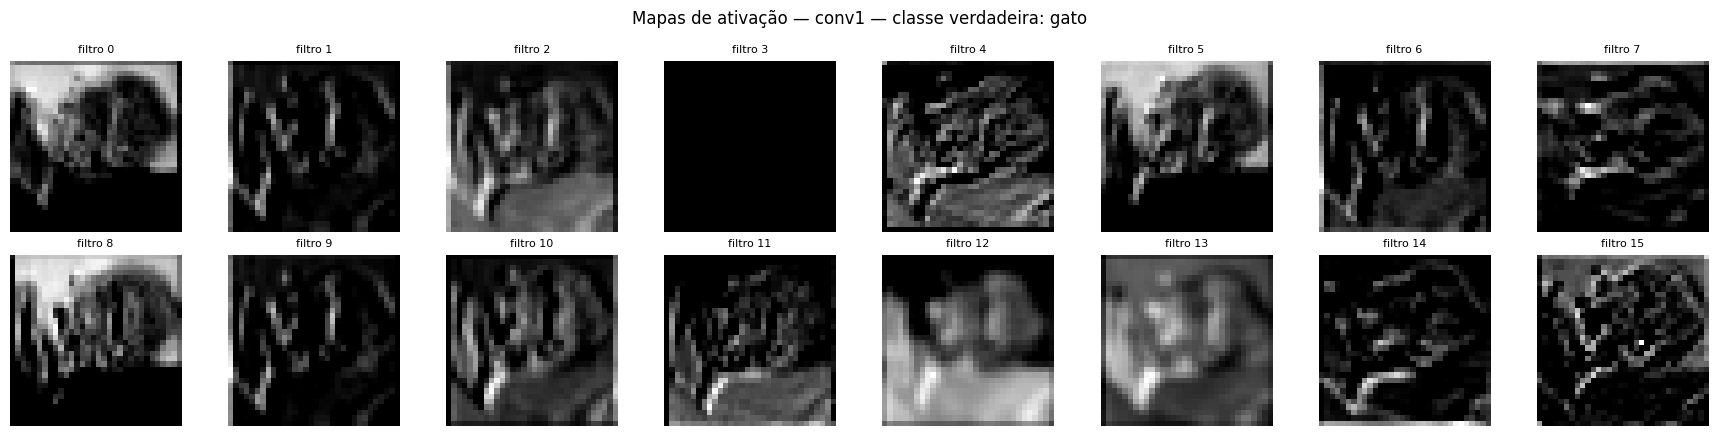

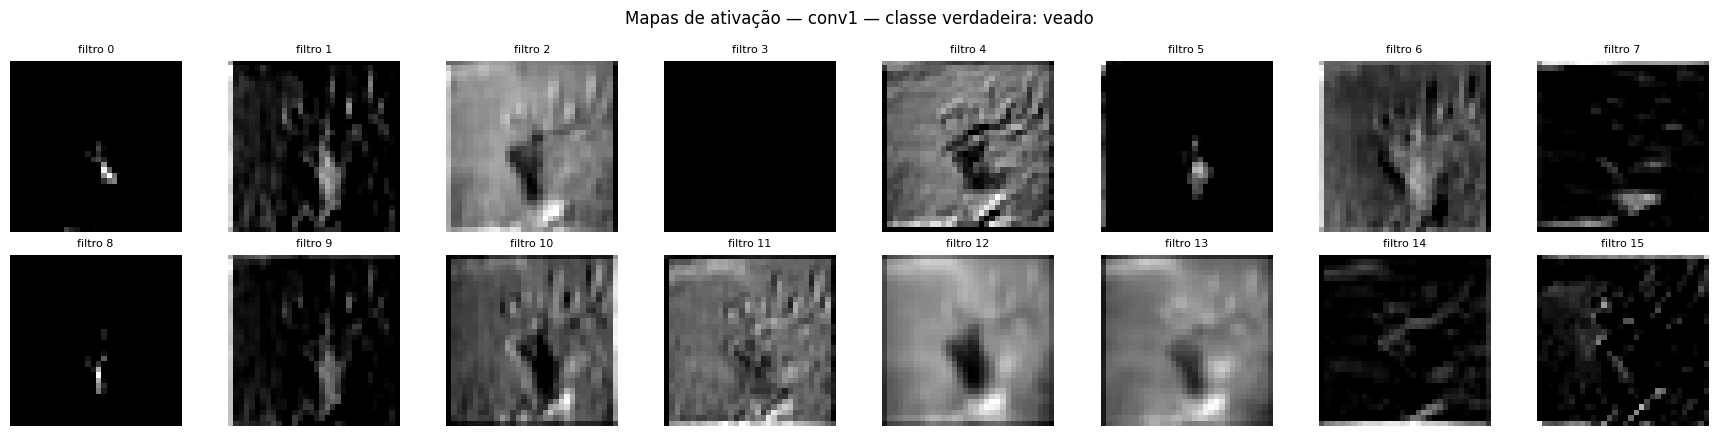

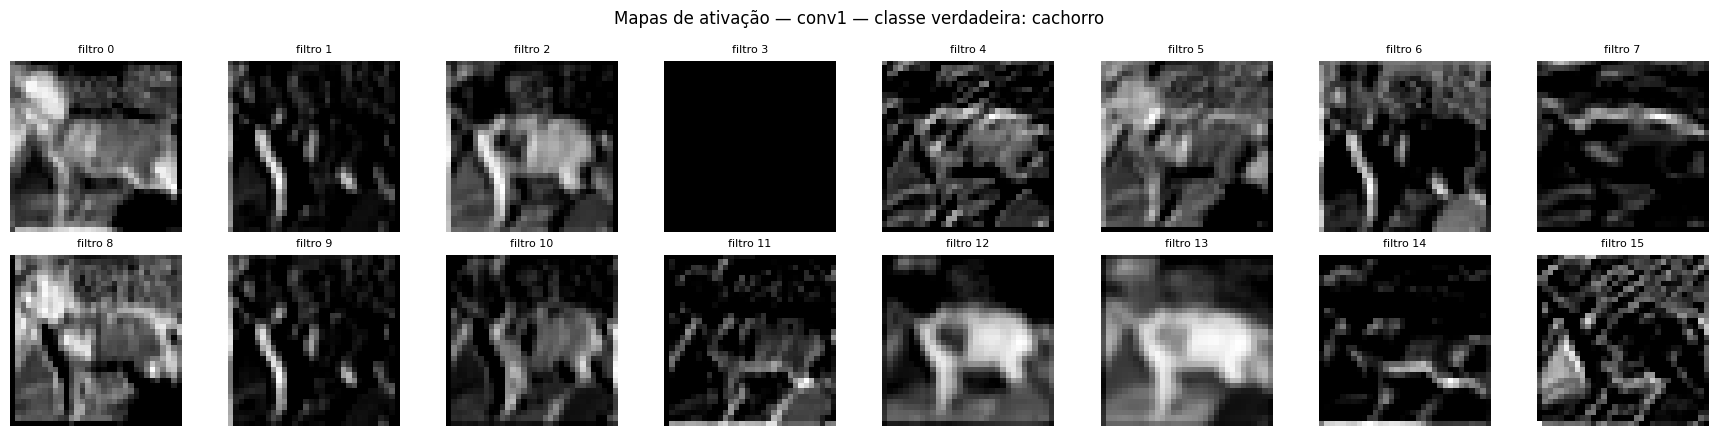

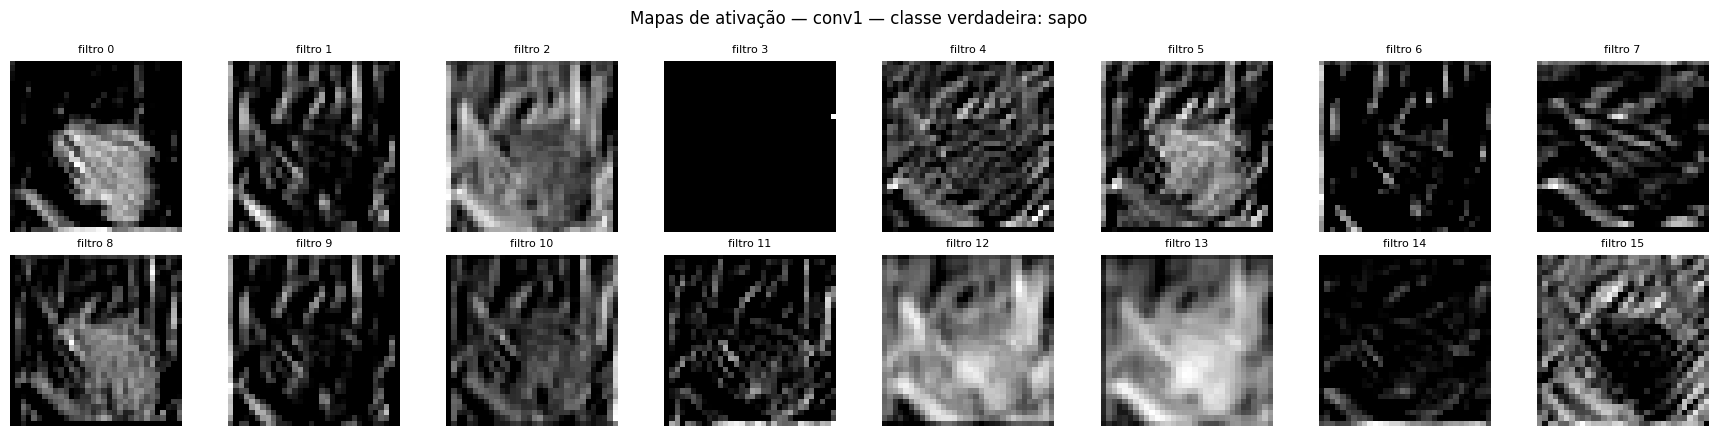

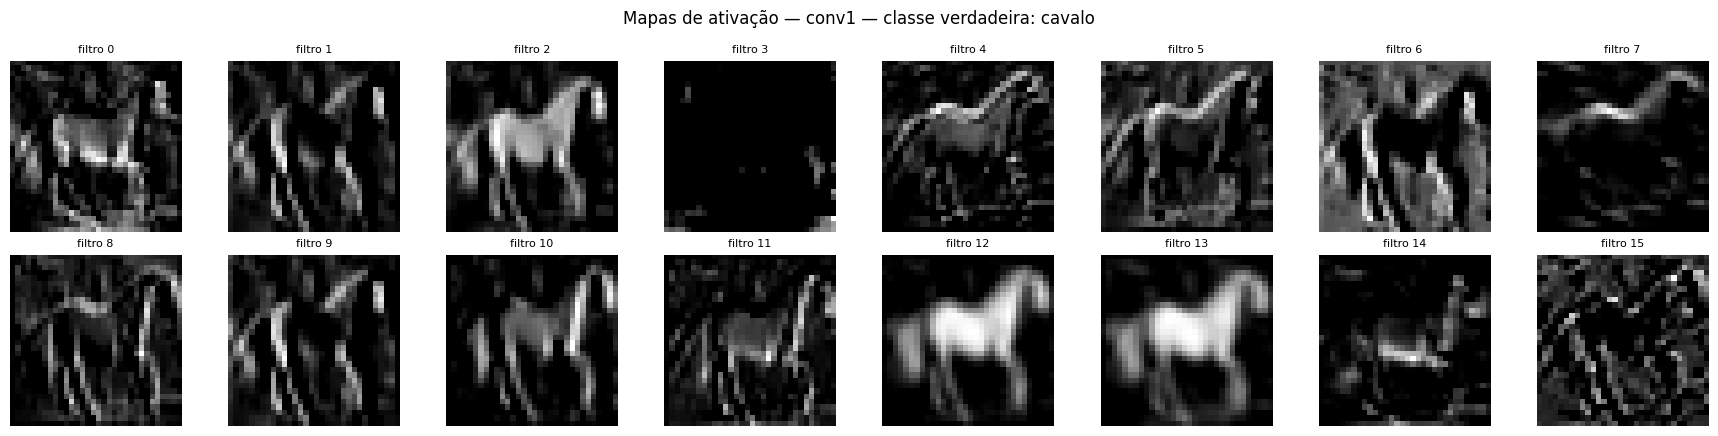

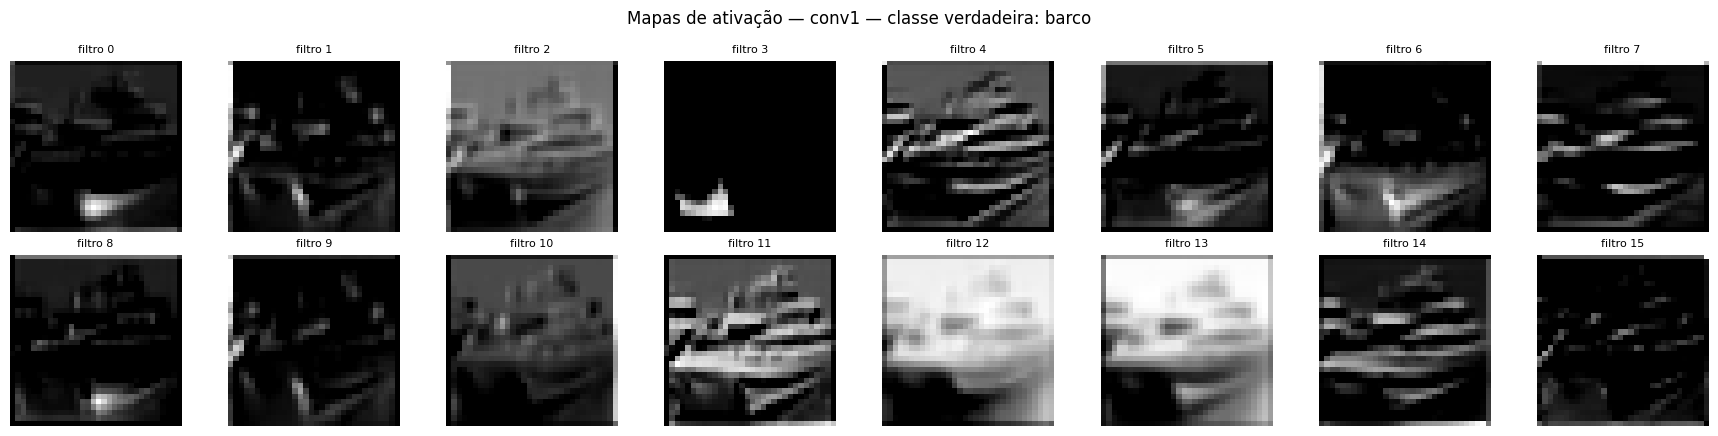

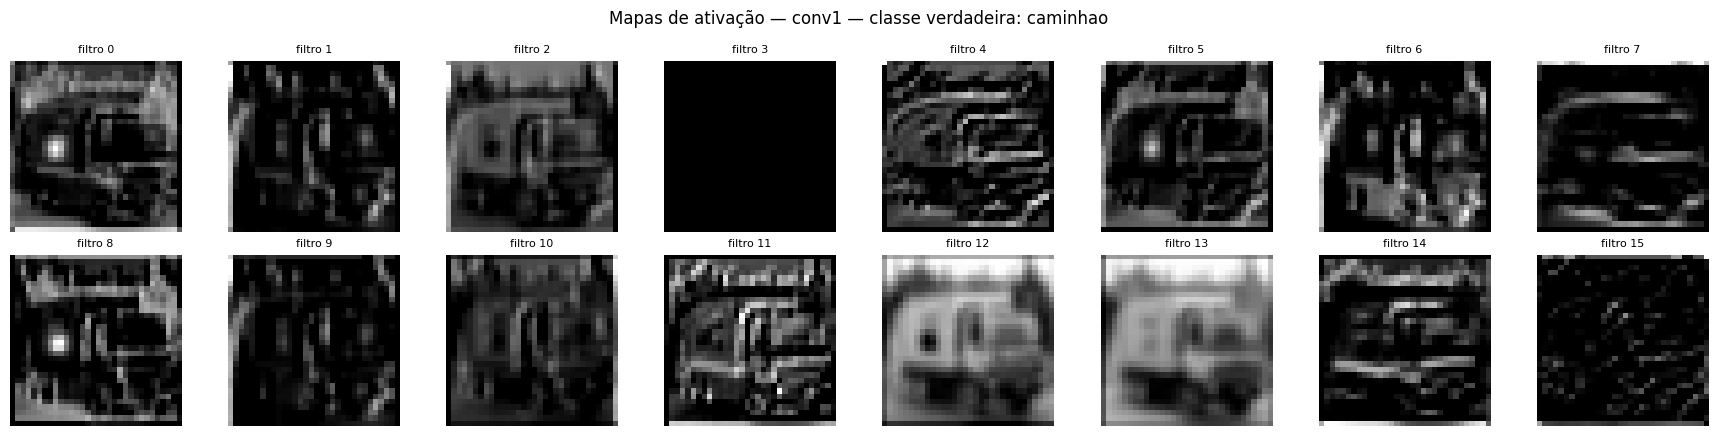

In [3]:
# CNN CIFAR-10 (simples): treino "mais longo", sem BatchNorm/Dropout/DataAug
# - Duas Conv2D com MaxPool
# - Flatten + Dense pequena
# - Predição por classe (10 imagens) + mapas de ativação da primeira conv
# Compatível com NumPy 2.0+

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Reprodutibilidade opcional
tf.random.set_seed(17)
np.random.seed(17)

# 1) Dados
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype("float32")/255.0
x_test  = x_test.astype("float32") /255.0
y_train = y_train.flatten()
y_test  = y_test.flatten()

class_names = ['aviao','carro','passaro','gato','veado',
               'cachorro','sapo','cavalo','barco','caminhao']

# 2) Modelo leve (sem BN/Dropout/DataAug)
#    Parametrização enxuta: 16 e 32x2 filtros convolucionais; Dense oculto com 32 neuronios e final com 10 neurônios
inputs = layers.Input(shape=(32,32,3))
x = layers.Conv2D(16, (3,3), padding="same", activation="relu", name="conv1")(inputs)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32, (3,3), padding="same", activation="relu", name="conv2")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)                # (8*8*32 = 2048)
x = layers.Dense(32, activation="relu")(x)  # ~65k params (leve)
outputs = layers.Dense(10, activation="softmax")(x)
model = models.Model(inputs, outputs, name="cnn_cifar10_simple")

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

# 3) Treino simples (mais épocas, sem refinamentos)
#    Para tempo razoável, você pode reduzir o conjunto de treino:
use_subset = False   # mude para True se quiser treinar mais rápido
n_sub = 20000        # por exemplo, 20k amostras
if use_subset:
    x_tr, y_tr = x_train[:n_sub], y_train[:n_sub]
else:
    x_tr, y_tr = x_train, y_train

history = model.fit(
    x_tr, y_tr,
    epochs=10, batch_size=128,       # "mais treino" mas ainda leve
    validation_split=0.1,
    verbose=1
)

# 4) Avaliação
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Acurácia de teste: {test_acc:.3f}")

# 5) Escolher 1 imagem por classe (0..9) do conjunto de teste
indices_per_class = []
for k in range(10):
    idxs = np.where(y_test == k)[0]
    indices_per_class.append(idxs[0])  # primeira ocorrência

imgs = x_test[indices_per_class]
labels_true = y_test[indices_per_class]

# 6) Predição nas 10 imagens escolhidas
preds = model.predict(imgs, verbose=0)
pred_labels = np.argmax(preds, axis=1)
pred_conf   = np.max(preds, axis=1)

# Grid 2x5 com imagem, classe verdadeira, previsão e confiança
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.imshow(imgs[i])
    true_c = class_names[labels_true[i]]
    pred_c = class_names[pred_labels[i]]
    conf = pred_conf[i]
    title = f"T:{true_c}\nP:{pred_c} ({conf:.2f})"
    ax.set_title(title, fontsize=10)
    ax.axis('off')
plt.suptitle("Uma imagem por classe — Verdadeiro vs. Predito (confiança)", fontsize=14)
plt.tight_layout()
plt.show()

# 7) Mapas de ativação da primeira camada (conv1) para cada uma das 10 categorias
act_model = models.Model(inputs=model.input, outputs=model.get_layer("conv1").output)

def plot_activations(img_batch, layer_output, max_filters=16, cols=8, title="Mapas de ativação"):
    acts = layer_output
    if acts.ndim == 4:
        acts = acts[0]  # (H, W, Cfilters)
    n_filters = min(acts.shape[-1], max_filters)
    rows = int(np.ceil(n_filters / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(2.2*cols, 2.2*rows))
    axes = axes.ravel()
    for i in range(rows*cols):
        axes[i].axis('off')
        if i < n_filters:
            a = acts[:, :, i]
            a = (a - np.min(a)) / (np.ptp(a) + 1e-8)  # compatível NumPy 2.0+
            axes[i].imshow(a, cmap='gray')
            axes[i].set_title(f"filtro {i}", fontsize=8)
    plt.suptitle(title, fontsize=12)
    plt.tight_layout()
    plt.show()

for i, idx in enumerate(indices_per_class):
    img = x_test[idx:idx+1]
    acts = act_model.predict(img, verbose=0)
    title = f"Mapas de ativação — conv1 — classe verdadeira: {class_names[y_test[idx]]}"
    plot_activations(img, acts, max_filters=16, cols=8, title=title)
